In [1]:
# Poisson's equation on a unit square
#
# In this script we solve Poisson's equation `Δu = 1` subject to boundary
# constraints, using the fact that the solution to the strong form minimizes
# the functional `∫ .5 ‖∇u‖² - u`. The domain is a unit square, and the
# solution is constrained to zero along the entire boundary.

from nutils import mesh, function, solver, export, cli, testing


def main(nelems: int):
    '''
    Poisson's equation on a unit square.
    .. arguments::
       nelems [32]
         Number of elements along edge.
    '''

    topo, x = mesh.unitsquare(nelems, etype='square')
    u = function.dotarg('u', topo.basis('std', degree=1))
    g = u.grad(x)
    J = function.J(x)

    sqr = topo.boundary.integral(u**2 * J, degree=2)
    cons = solver.optimize(('u',), sqr, droptol=1e-12)

    energy = topo.integral((g @ g / 2 - u) * J, degree=1)
    args = solver.optimize(('u',), energy, constrain=cons)

    bezier = topo.sample('bezier', 3)
    x, u = bezier.eval([x, u], **args)
    export.triplot('u.png', x, u, tri=bezier.tri, cmap='jet')

    return args


# If the script is executed (as opposed to imported), :func:`nutils.cli.run`
# calls the main function with arguments provided from the command line. To
# keep with the default arguments simply run :sh:`python3 poisson.py`.


if __name__ == '__main__':
    cli.run(main)

# Once a simulation is developed and tested, it is good practice to save a few
# strategic return values for regression testing. The :mod:`nutils.testing`
# module, which builds on the standard :mod:`unittest` framework, facilitates
# this by providing :func:`nutils.testing.TestCase.assertAlmostEqual64` for the
# embedding of desired results as compressed base64 data.


class test(testing.TestCase):

    def test_default(self):
        args = main(nelems=10)
        self.assertAlmostEqual64(args['u'], '''
            eNp9zrENwCAMBEBGYQJ444o2ozAAYgFmYhLEFqxAmye1FUtf+PSy7Jw9J6yoKGiMYsUTrq44kaVKZ7JM
            +lWlDdlymEFXXC2o3H1C8mmzXz5t6OwhPfTDO+2na9+1f7D/teYFdsk5vQ==''')

# example:tags=Poisson's equation

argument 'f' requires a value


SystemExit: 2

/home/prins/st8/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [26]:
# Poisson's equation on a unit square
#
# In this script we solve Poisson's equation `Δu = 1` subject to boundary
# constraints, using the fact that the solution to the strong form minimizes
# the functional `∫ .5 ‖∇u‖² - u`. The domain is a unit square, and the
# solution is constrained to zero along the entire boundary.

from nutils import mesh, function, solver, export, cli, testing
import matplotlib.pyplot as plt

def main(nelems):
    '''
    Poisson's equation on a unit square.
    .. arguments::
       nelems [32]
         Number of elements along edge.
    '''

    topo, x = mesh.unitsquare(nelems, etype='square')
    u = function.dotarg('u', topo.basis('std', degree=1))
    g = u.grad(x)
    J = function.J(x)

    sqr = topo.boundary.integral(u**2 * J, degree=2)
    cons = solver.optimize(('u',), sqr, droptol=1e-12)

    energy = topo.integral((g @ g / 2 - u) * J, degree=1)
    args = solver.optimize(('u',), energy, constrain=cons)

    bezier = topo.sample('bezier', 3)
    x, u = bezier.eval([x, u], **args)

    #plot
    plt.tripcolor(x[:,0], x[:,1], u)
    plt.xlim(0,1)
    plt.ylim(0,1)

    return args

optimize > constrained 40/121 dofs
optimize > optimum value 0.00e+00
optimize > solve > solving 81 dof system to machine precision using arnoldi solver
optimize > solve > solver returned with residual 6e-17
optimize > optimum value -1.75e-02


{'u': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01386918, 0.02136364, 0.02610865,
        0.02863636, 0.02947894, 0.02863636, 0.02610865, 0.02136364,
        0.01386918, 0.        , 0.        , 0.02136364, 0.03547672,
        0.04409091, 0.04895787, 0.05045455, 0.04895787, 0.04409091,
        0.03547672, 0.02136364, 0.        , 0.        , 0.02610865,
        0.04409091, 0.0558204 , 0.06227273, 0.0644235 , 0.06227273,
        0.0558204 , 0.04409091, 0.02610865, 0.        , 0.        ,
        0.02863636, 0.04895787, 0.06227273, 0.06988914, 0.07227273,
        0.06988914, 0.06227273, 0.04895787, 0.02863636, 0.        ,
        0.        , 0.02947894, 0.05045455, 0.0644235 , 0.07227273,
        0.07488914, 0.07227273, 0.0644235 , 0.05045455, 0.02947894,
        0.        , 0.        , 0.02863636, 0.04895787, 0.06227273,
        0.06988914, 0.07227273, 0.06988914,

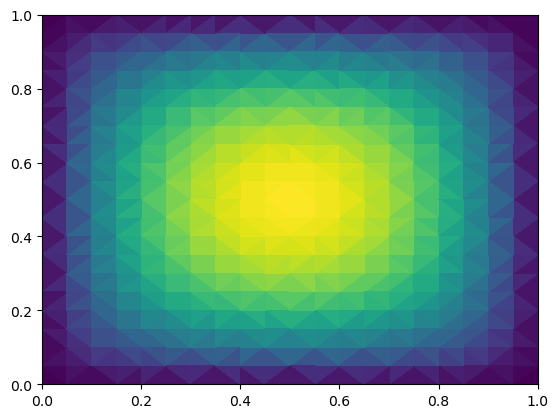

In [27]:
main(10)